# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [3]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')

# Dictionary

**Age** (numerical)

**Job**: Type of Job (categorical)

**Marital**: marital status (categorical)

**Education**: (categorical)

**Default**: has credit in default? (categorical)

**Housing**: has housing loan? (categorical)

**Loan**: has personal loan? (categorical)

**contact**: contact communication type (categorcial)

**month**: last contact month of year (categorical)

**day_of_week**: last contact day of the week (categorical)

**duration**: last contact duration, in seconds (numerical)

**Important note**: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.

**campaign**: number of contacts performed during this campaign and for this client (numerical)

**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**previous**: number of contacts performed before this campaign and for this client (numerical)

**poutcome**: outcome of the previous marketing campaign (categorical)

**Important note**: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.


**emp.var.rate**: employment variation rate - quarterly indicator (numeric)

**cons.price.idx**: consumer price index- monthly indicator (numeric)

**cons.conf.idx**: consumer confidence index - monthly indicator (numeric)

**euribor3m**: euribor 3 month rate: - daily indicator(numeric)

**nr.employed**: number of employees - quarterly indicator (numeric)

### Target variable:

**y**: has the client subscribed a term deposit?

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_raw.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19427,49,management,married,university.degree,no,unknown,unknown,cellular,aug,wed,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
36685,46,technician,married,professional.course,no,no,no,telephone,jun,fri,...,1,999,1,failure,-2.9,92.963,-40.8,1.268,5076.2,no
22986,53,admin.,married,university.degree,unknown,yes,no,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28786,31,admin.,married,high.school,no,no,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no
3261,36,unknown,single,basic.6y,unknown,no,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
14990,30,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
19206,32,technician,single,professional.course,no,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
10692,35,technician,married,professional.course,no,yes,no,telephone,jun,tue,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
29282,37,entrepreneur,married,basic.4y,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
21608,41,blue-collar,divorced,basic.9y,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [6]:
df_raw['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [7]:
df_raw['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [8]:
df_raw['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [9]:
df_raw['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [15]:
df_raw['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [16]:
df_raw['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

## Step 2

In [17]:
df_raw['job'] = pd.Categorical(df_raw['job'])
df_raw['marital'] = pd.Categorical(df_raw['marital'])
df_raw['housing'] = pd.Categorical(df_raw['housing'])

In [27]:
df_raw.groupby(['y','job','default'])[['y']].size()

y    job          default
no   admin.       no         7846
                  unknown    1224
                  yes           0
     blue-collar  no         5602
                  unknown    3014
                             ... 
yes  unemployed   unknown      14
                  yes           0
     unknown      no           30
                  unknown       7
                  yes           0
Length: 72, dtype: int64

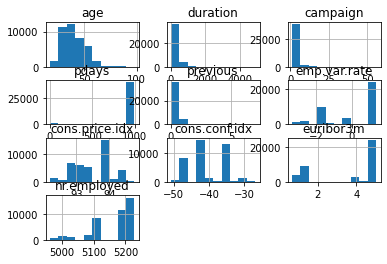

In [8]:
df_raw.hist()
plt.show()

##  Data desbalanceada

In [11]:
df_raw['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Step 3


In [9]:
df_raw[df_raw.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [10]:
df_raw_without_duplicates  = df_raw.drop_duplicates()

In [12]:
df_raw_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [14]:
df_raw_without_duplicates.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Hay algunas características que incluyen valores desconocidos.
En las características categoirales, sustituya la categoría desconocida por el valor más frecuente.
En las características numéricas, sustituya los valores desconocidos por la media. (NO LO PUDE HACER)